In [6]:
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

[*********************100%***********************]  1 of 1 completed


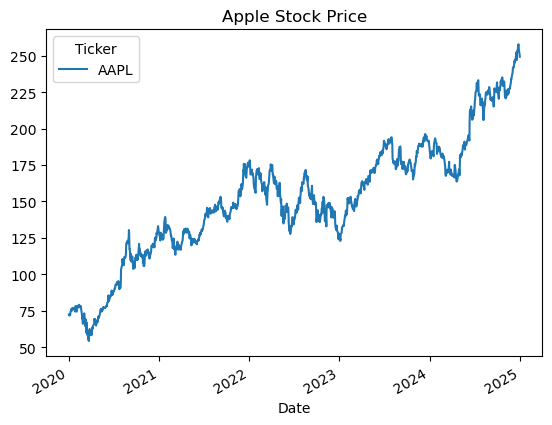

In [15]:
### Fetch annualhistorical stock data for Apple Inc. (AAPL)
data = yf.download("AAPL", start="2020-01-01", end="2025-01-01", interval="1d")

### Display the close price data
data['Close'].plot(title='Apple Stock Price')
plt.show()

In [16]:
# Calculate log returns
data["Log_Returns"] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

In [17]:
# 1. Return vs Return^2 
returns = data["Log_Returns"]
squared_returns = returns ** 2

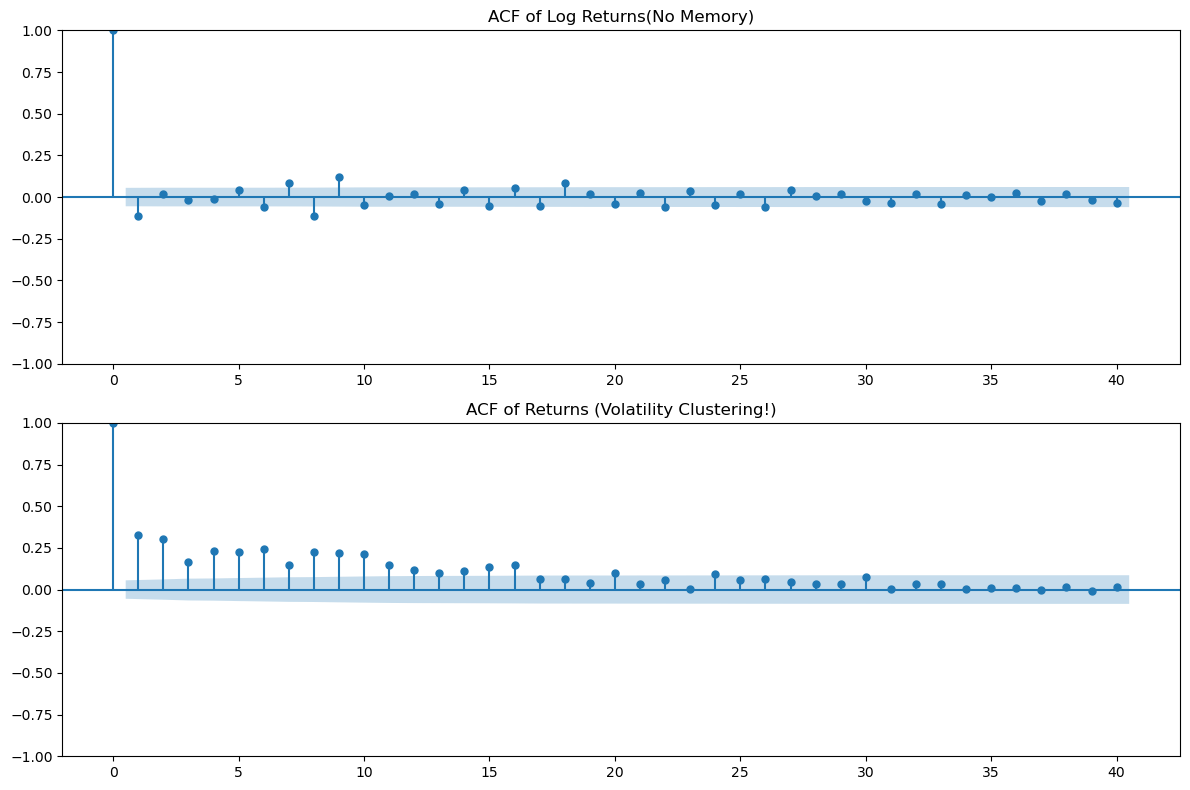

In [18]:
# 2. Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# ACF returns (No memory)
plot_acf(returns, lags=40, ax=ax1, title='ACF of Log Returns(No Memory)')

# ACF squared returns (Volatility Clustering)
plot_acf(squared_returns, lags=40, ax=ax2, title='ACF of Returns (Volatility Clustering!)')

plt.tight_layout()
plt.savefig("Figure_1_ACF_Returns_and_Squared_Returns.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
from arch import arch_model

In [21]:
# 1. Define GARCH(1,1) model
# rescale=True may automatically amplify data by 100 times so as to make optimizer converge easily
garch_model = arch_model(data["Log_Returns"] * 100, vol='Garch', p=1, q=1)

# 2. Training MLE
res = garch_model.fit(disp='off')

# 3. Print
print(res.summary())

# 4. Extract Volatility
data['Conditional_Vol'] = res.conditional_volatility

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2505.45
Distribution:                  Normal   AIC:                           5018.90
Method:            Maximum Likelihood   BIC:                           5039.45
                                        No. Observations:                 1257
Date:                Wed, Dec 24 2025   Df Residuals:                     1256
Time:                        20:55:36   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1425  5.045e-02      2.825  4.731e-03 [4.363e-0

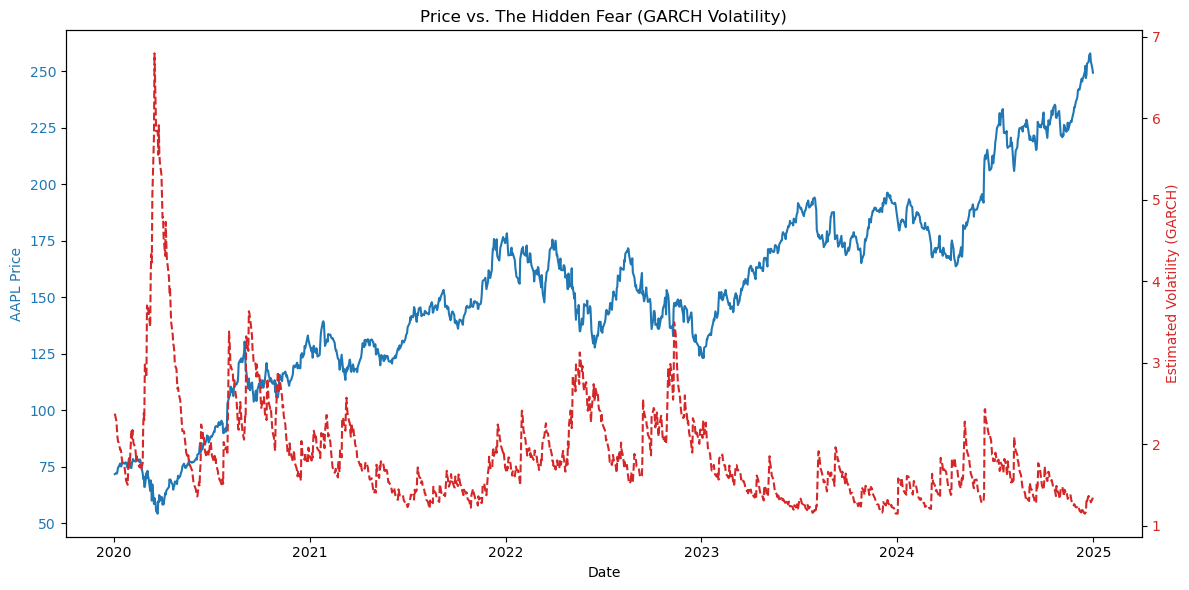

In [22]:
# 7. 可视化：价格 vs 动态波动率
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('AAPL Price', color=color)
ax1.plot(data.index, data['Close'], color=color, label='Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # 共享 X 轴
color = 'tab:red'
ax2.set_ylabel('Estimated Volatility (GARCH)', color=color)
ax2.plot(data.index, data['Conditional_Vol'], color=color, linestyle='--', label='Volatility')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Price vs. The Hidden Fear (GARCH Volatility)")
fig.tight_layout()
plt.savefig("Figure_2_Price_vs_Hidden_Fear.png", dpi=300, bbox_inches='tight')
plt.show()